In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df=pd.read_csv("/Users/ajdie/datasets/311_Service_Requests_from_2010_to_Present.csv")

df.head()

C:\Users\ajdie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# convert the 'Date' column to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
 
# Check the format of 'Date' column
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
#make sure that Column 'Created Date' and 'Closed Date' do not have any null values remaining

df.dropna(subset=['Created Date','Closed Date','City'], inplace=True)

#create a new TimeDelta Columns as 'Request_Closing_Time' which will be the difference of 'Closed Date' and 'Created Date'

df['Request Closing Time'] = df['Closed Date'] - df['Created Date']

df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request Closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [6]:
#check info for column names that we will not need

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298028 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      298028 non-null  int64          
 1   Created Date                    298028 non-null  datetime64[ns] 
 2   Closed Date                     298028 non-null  datetime64[ns] 
 3   Agency                          298028 non-null  object         
 4   Agency Name                     298028 non-null  object         
 5   Complaint Type                  298028 non-null  object         
 6   Descriptor                      292122 non-null  object         
 7   Location Type                   297906 non-null  object         
 8   Incident Zip                    298024 non-null  float64        
 9   Incident Address                253663 non-null  object         
 10  Street Name                     253663 non-n

In [7]:
#drop below columns

df = df.drop(columns=['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name', 'School Number','School Region',
'School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found',
'School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',
'Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
'Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date',
'Community Board','Facility Type','Location'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298028 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              298028 non-null  int64          
 1   Created Date            298028 non-null  datetime64[ns] 
 2   Closed Date             298028 non-null  datetime64[ns] 
 3   Agency                  298028 non-null  object         
 4   Complaint Type          298028 non-null  object         
 5   Descriptor              292122 non-null  object         
 6   Location Type           297906 non-null  object         
 7   Incident Zip            298024 non-null  float64        
 8   City                    298028 non-null  object         
 9   Status                  298028 non-null  object         
 10  Resolution Description  298028 non-null  object         
 11  Borough                 298028 non-null  object         
 12  Latitude        

In [8]:
#As most of the requests are 'Closed', hence our analysis will include only 'Closed' requests and we will drop other records
#Then we will drop the 'Status' column
#Selecting not null values of 'Latitude', 'Longitude' and 'Descriptor' column values will furthere remove empty values

df = df[df['Status']=='Closed']
df.drop(['Status'],inplace=True, axis=1)
df = df[(df['Descriptor'].notnull()) & (df['Latitude'].notnull()) & (df['Longitude'].notnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291164 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291164 non-null  int64          
 1   Created Date            291164 non-null  datetime64[ns] 
 2   Closed Date             291164 non-null  datetime64[ns] 
 3   Agency                  291164 non-null  object         
 4   Complaint Type          291164 non-null  object         
 5   Descriptor              291164 non-null  object         
 6   Location Type           291109 non-null  object         
 7   Incident Zip            291162 non-null  float64        
 8   City                    291164 non-null  object         
 9   Resolution Description  291164 non-null  object         
 10  Borough                 291164 non-null  object         
 11  Latitude                291164 non-null  float64        
 12  Longitude       

In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,Request Closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02


In [10]:
#Above count shows that a lot of columns have same or very few deifferent records
#Hence we will convert them to Categorical data

df.nunique()

Unique Key                291164
Created Date              252025
Closed Date               232045
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          53
Resolution Description        12
Borough                        5
Latitude                  123031
Longitude                 123130
Request Closing Time       47136
dtype: int64

In [11]:
#Date Values will be converted to DateTime objects.
#Date values should not be converted to categories.

exclude_columns = ['Created Date','Closed Date']

for col in exclude_columns:
    df[col] = pd.to_datetime(df[col],format='%m/%d/%Y %I:%M:%S')
    
for col in df.columns:
    if df[col].nunique() < 300 and col not in exclude_columns:
        df[col] = df[col].astype('category')

In [12]:
#Our DataFrame size has been reduced from 125+ MB to 18 MB now
#Objects have been converted to Categories and DateTime as per requirement

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291164 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291164 non-null  int64          
 1   Created Date            291164 non-null  datetime64[ns] 
 2   Closed Date             291164 non-null  datetime64[ns] 
 3   Agency                  291164 non-null  category       
 4   Complaint Type          291164 non-null  category       
 5   Descriptor              291164 non-null  category       
 6   Location Type           291109 non-null  category       
 7   Incident Zip            291162 non-null  category       
 8   City                    291164 non-null  category       
 9   Resolution Description  291164 non-null  category       
 10  Borough                 291164 non-null  category       
 11  Latitude                291164 non-null  float64        
 12  Longitude       

<AxesSubplot:>

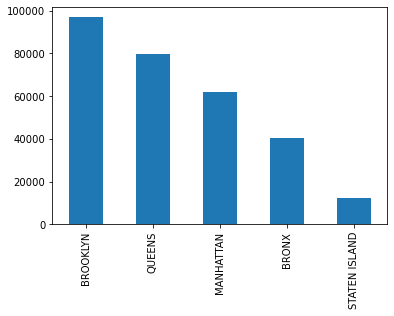

In [13]:
df['Borough'].value_counts().plot(kind='bar')

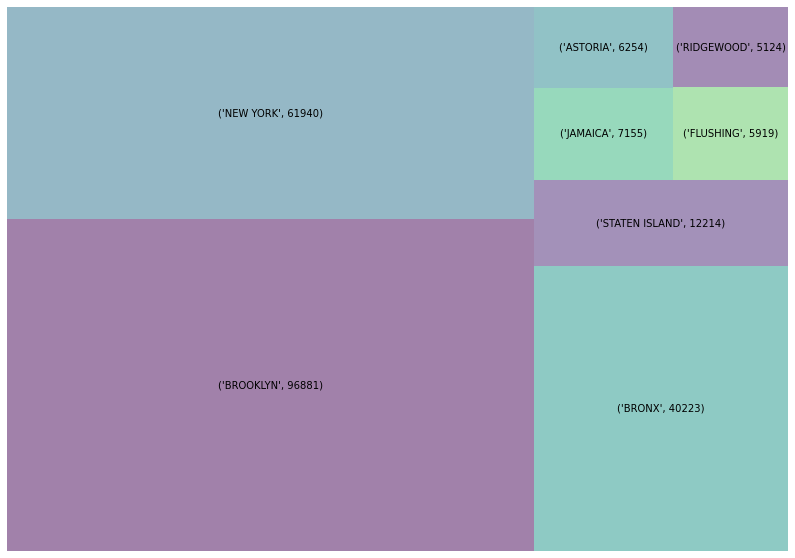

In [14]:
#treemap of top 8 cities for highest number of complaints

complaints_by_city = pd.DataFrame(df['City'].value_counts()[:8])

import squarify
fig = plt.gcf()
fig.set_size_inches(14, 10)
label=zip(list(complaints_by_city.index),complaints_by_city['City'])
squarify.plot(sizes=complaints_by_city['City'], label=label, alpha=0.5)
plt.axis('off')
plt.show()

In [15]:
#range of data from the year

print('Start from : ',min(df['Created Date']))
print('Till : ',max(df['Created Date']))

Start from :  2015-03-29 00:33:01
Till :  2015-12-31 23:59:45


<AxesSubplot:>

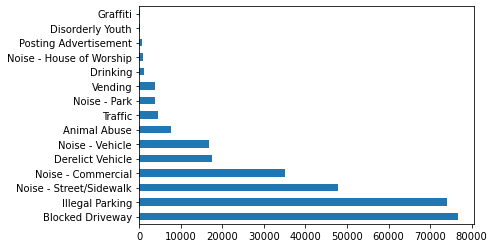

In [16]:
#plot the number of complaints type received

df['Complaint Type'].value_counts().plot(kind='barh')

<AxesSubplot:>

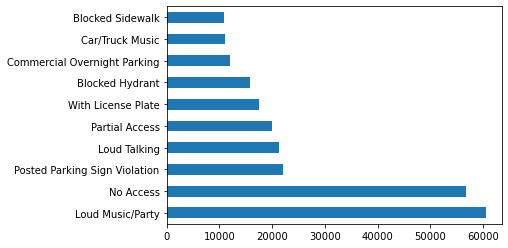

In [17]:
#we plot the complaints by 'Descriptor' to varify our previous point

df['Descriptor'].value_counts()[:10].plot(kind='barh')

In [18]:
#top 6 of the highest complaint types with respect to Boroughs

top8_complaints = ['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle','Noise - Vehicle','Animal Abuse','Traffic']
comp_borough = df.groupby(['Borough','Complaint Type']).size().unstack()
comp_borough = comp_borough[top8_complaints]
comp_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle,Animal Abuse,Traffic
Borough,,,,,,,,
BRONX,12741,7831,8864,2431,1949,3385,1413,356
BROOKLYN,28128,27394,13316,11452,5167,5146,2390,1082
MANHATTAN,2056,11981,20362,14530,530,5375,1511,1532
QUEENS,31630,21950,4391,6058,8102,2608,1874,1303
STATEN ISLAND,2141,4883,815,677,1763,356,557,196


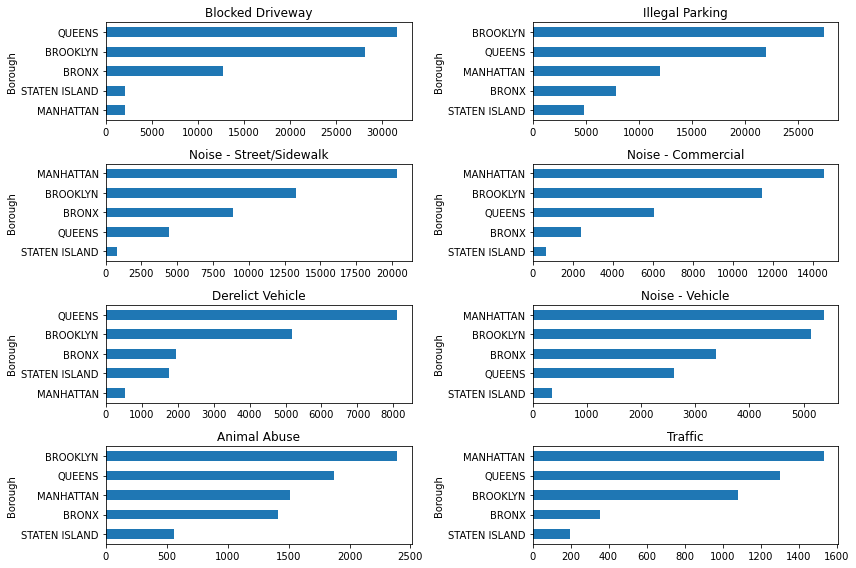

In [19]:
#plotting the different boroughs in regards to specific complaints for ranking

col_number = 2
row_number = 4
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(comp_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

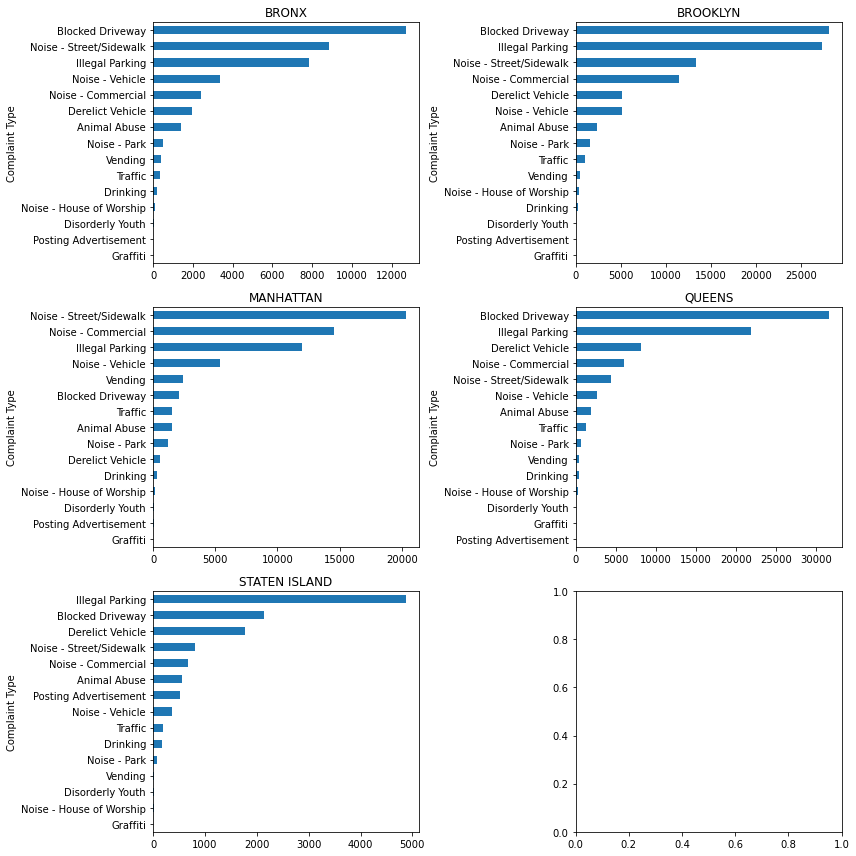

In [20]:
#plotting the different complaints for each borough

borough_comp = df.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [21]:
#.describe to get some info on the resolution times

df['Request Closing Time'].describe()

count                       291164
mean     0 days 04:18:31.308657663
std      0 days 06:03:43.742847273
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:23
max               24 days 16:52:22
Name: Request Closing Time, dtype: object

In [22]:
#First we will convert our Request_Closing_Time from days to number of hours
#Converting 2:30 hours to timedelta64[h] will give 2 hours
#We will add 1 to say that request was closed within 3 hours

df['Request Closing Hours'] = df['Request Closing Time'].astype('timedelta64[h]')+1
df[['Request Closing Time','Request Closing Hours']].head()

,Request Closing Time,Request Closing Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [23]:
#find out the mean and standard distribution of the data

mean = df['Request Closing Hours'].mean()
std = df['Request Closing Hours'].std()

print('Mean: ',mean)
print('Std:  ',std)

Mean:  4.818466568669203
Std:   6.063935739044802


In [24]:
#As we can see, some of the closing times are too high and hence will be dealt as outliers
#We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1

df['Request Closing Hours'].sort_values().tail()

12167     224.0
12168     224.0
21268     520.0
23664     578.0
244488    593.0
Name: Request Closing Hours, dtype: float64

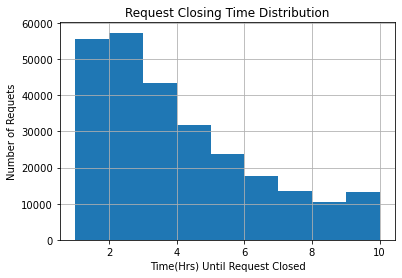

In [25]:
#z-statistic = (value-mean)/std

plot_data = df[((df['Request Closing Hours']-mean)/std) < 1]
plot_data['Request Closing Hours'].hist(bins=9)
plt.xlabel('Time(Hrs) Until Request Closed')
plt.ylabel('Number of Requets')
plt.title('Request Closing Time Distribution')
plt.show()

#Below shows that half of overall complaints were closed within 2 to 4 hours
#Around 99% of the complaints were closed within 10 hours

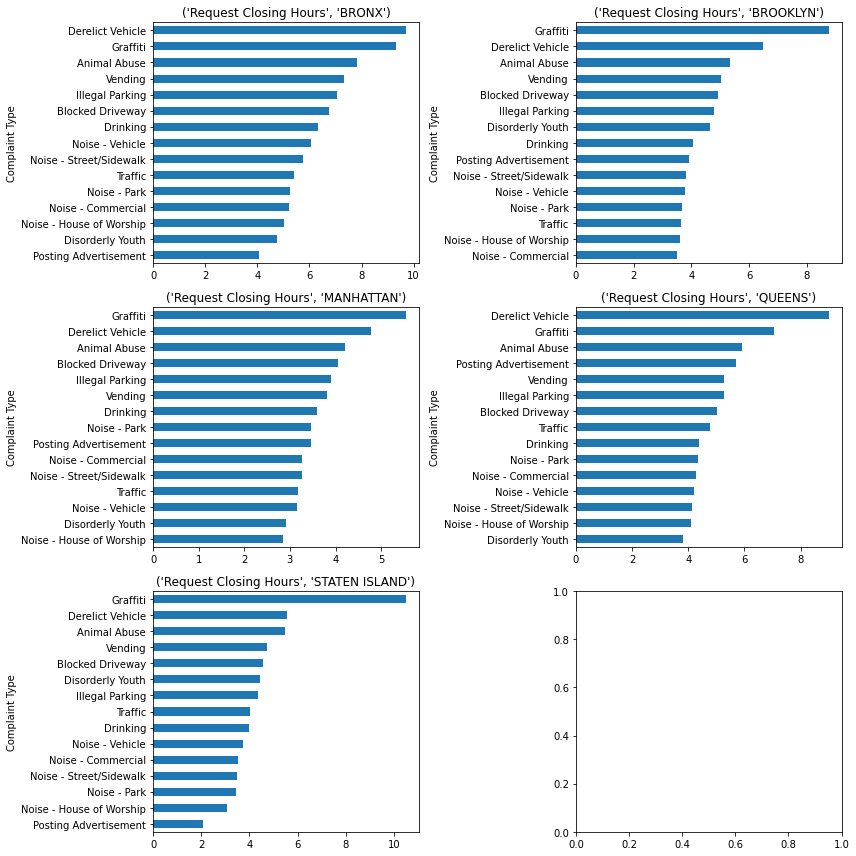

In [26]:
#complaint closure by borough

citywise_resolution = df.groupby(['Complaint Type','Borough'])[['Request Closing Hours']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

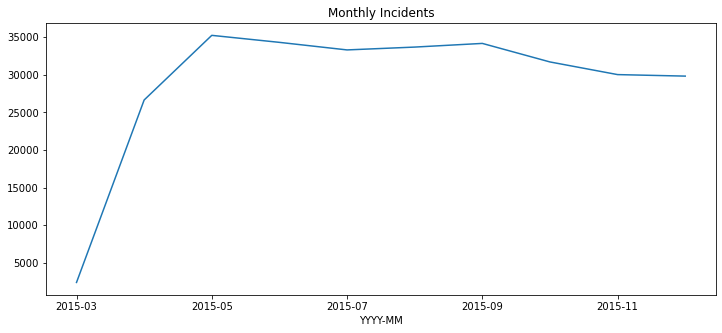

In [27]:
#month wise analysis of complaints

import datetime
df['YYYY-MM'] = df['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

monthly_incidents =  df.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Monthly Incidents');

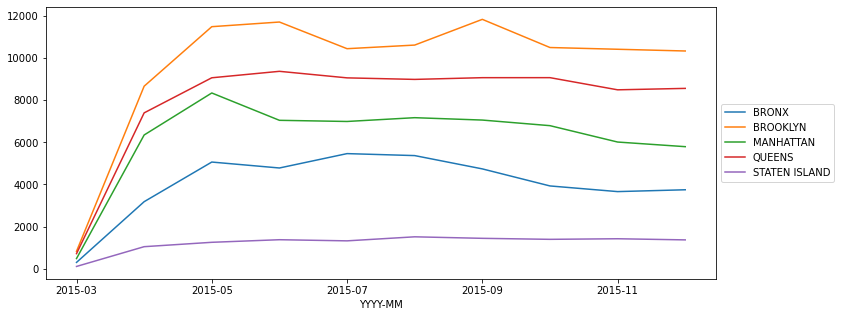

In [28]:
#complaints per Borough through the year

df.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(12,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

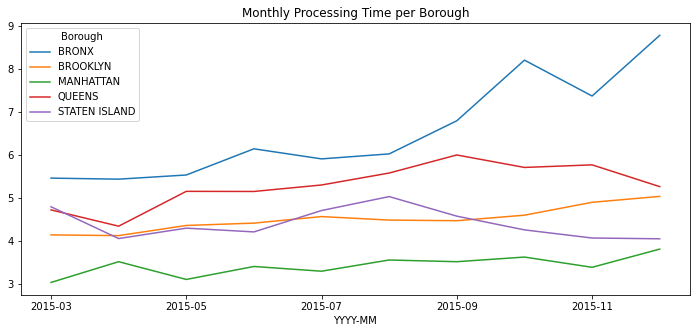

In [29]:
#complaints per Borough through the year

df.groupby(['YYYY-MM','Borough'])['Request Closing Hours'].mean().unstack().plot(figsize=(12,5),
                                                                                      title='Monthly Processing Time per Borough');

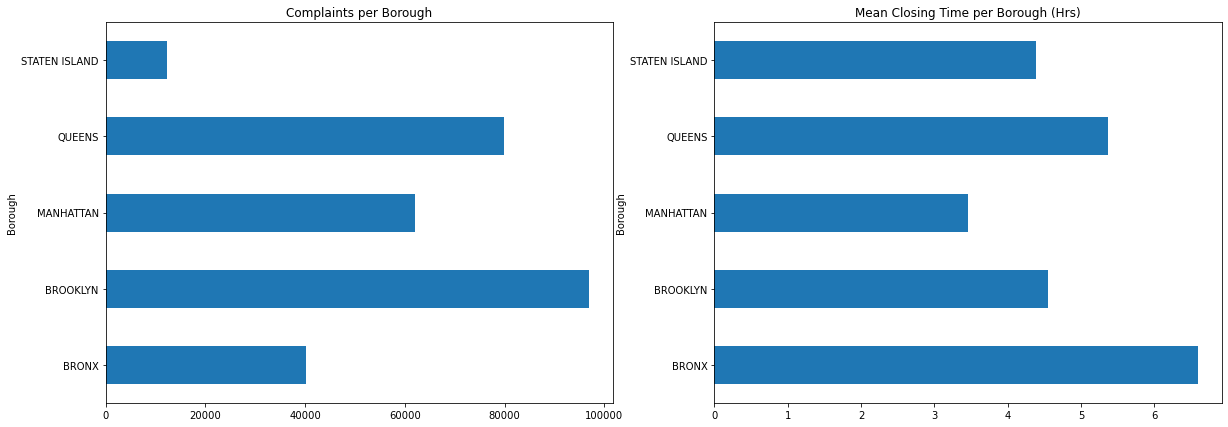

In [30]:
fig = plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
df.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough');

plt.subplot(1, 2, 2)
df.groupby('Borough')['Request Closing Hours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hrs)');
plt.show()

<AxesSubplot:>

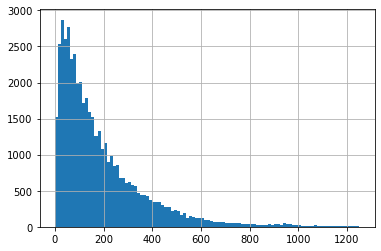

In [31]:
#HYPOTHESIS TESTING

#Whether the average response time across complaint types is similar or not (overall)
#First we will convert our hourly timedelta into minuted for more precise results..

df['Request Closing Minutes'] = df['Request Closing Time'].astype('timedelta64[m]')+1

original = df[df['Complaint Type']=='Noise - Street/Sidewalk']['Request Closing Minutes']
original.hist(bins=100,range=(0,1250))

#Below is the distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type
#We see a positive skewness in data if we limit the range to 1250

In [32]:
original.describe()

#below conditions should be met before conducting ANOVA (log, std, samples drawn independently of each other)
#from the below stats, it becomes clear that we have very few but very large values after th 75th percentile

count    47748.000000
mean       207.237790
std        327.180293
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request Closing Minutes, dtype: float64

In [33]:
#positive skewness in the data so apply log transformation to see more of a normal distribution

data = {}
for complaint in df['Complaint Type'].unique():
    data[complaint] = np.log(df[df['Complaint Type']==complaint]['Request Closing Minutes'])

In [34]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

<AxesSubplot:>

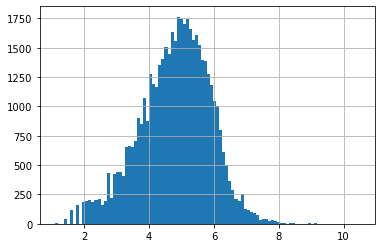

In [35]:
data['Noise - Street/Sidewalk'].hist(bins=100)

#below distribution plot shows that once we apply log Transformation, 
#skewness is almost removed and it looks more like a normal distribution

<AxesSubplot:>

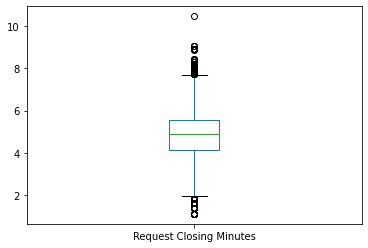

In [36]:
data['Noise - Street/Sidewalk'].plot(kind='box')

In [37]:
#testing to see if std for all groups is the same
#below output proves that

for complaint in data.keys():
    print(data[complaint].std())

1.0883569179983164
0.968942621211635
1.067164643764765
1.247250640294688
1.0740675807552482
1.1589202042209954
1.1947703475310807
1.0641925812925177
1.0360355296426127
1.0995431178584425
1.1702228606633116
1.0358383203301404
1.1061328713039125
1.0581967861803852
1.026822302225286


In [38]:
[complaint for complaint in data.keys()]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

In [ ]:
#Null Hypothesis: Average response time for all the complaints type is same.

#Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

#Below We conduct ANOVA test for top 5 type of complaints
#For a 95% of confidence interval we choose our alpha as 0.05 for 5%
#Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

#if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

#if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [39]:
# import f_oneway from scipy.stats library

from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2455.140, p=0.000
Different distributions (reject H0)


In [40]:
#As our p-value is quite low , hence it is being converted to 0.0
#Since our p-value is lower than our critical p-value, we have enough evidence to reject our Null Hypothesis and that the
#average response time for all the complaints type is not same.

In [41]:
sample = df[['Complaint Type','Borough','City','Longitude','Latitude']]

In [42]:
#since Our data in Complaint Type, Borough and City is Categorical hence we can not directly apply corr() method
#first we will convert the categorical data to numerical data by mapping the category to category codes

sample['Complaint Type'] = sample['Complaint Type'].cat.codes
sample['Borough'] = sample['Borough'].cat.codes
sample['City'] = sample['City'].cat.codes

<ipython-input-42-03262d89e0a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Complaint Type'] = sample['Complaint Type'].cat.codes
<ipython-input-42-03262d89e0a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Borough'] = sample['Borough'].cat.codes
<ipython-input-42-03262d89e0a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [43]:
sample.head()

,Complaint Type,Borough,City,Longitude,Latitude
0,10,2,33,-73.923501,40.865682
1,1,3,1,-73.915094,40.775945
2,1,0,6,-73.888525,40.870325
3,6,0,6,-73.828379,40.835994
4,6,3,13,-73.874170,40.733060


In [44]:
sample.corr(method='pearson')

,Complaint Type,Borough,City,Longitude,Latitude
Complaint Type,1.000000,-0.076829,0.094489,-0.181765,0.170199
Borough,-0.076829,1.000000,0.718829,0.022142,-0.250843
City,0.094489,0.718829,1.000000,-0.119088,-0.004003
Longitude,-0.181765,0.022142,-0.119088,1.000000,0.368842
Latitude,0.170199,-0.250843,-0.004003,0.368842,1.000000


In [ ]:
#as we can see from above table, there is no relationship between complaint type and location
#which will be the general idea as in our data, most of the Complaint type are of 'Blocked Driveway' 
#and 'Illegal Parking' which is common in all of the Boroughs